In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

from scipy import stats

In [2]:
df = pd.read_csv('../data/bayut/cleaned/ready_flats_valuation.csv')
df = df[(df['surface'] <= 4000)]
df['beds'] = df['beds'].astype(int)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27141 entries, 0 to 27140
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       27141 non-null  int64  
 1   URL              27141 non-null  object 
 2   building         15164 non-null  object 
 3   district         27141 non-null  object 
 4   neighborhood     26812 non-null  object 
 5   price            27141 non-null  int64  
 6   beds             27141 non-null  int32  
 7   baths            27141 non-null  int64  
 8   surface          27141 non-null  float64
 9   lat              27141 non-null  float64
 10  long             27141 non-null  float64
 11  highlights       27141 non-null  object 
 12  furnishing       15862 non-null  object 
 13  amenities        27141 non-null  object 
 14  completion_year  27141 non-null  int64  
 15  floor            731 non-null    float64
 16  price_sqf        27141 non-null  float64
 17  views       

In [4]:
# delete unnecessary columns and convert to correct types 

df = df.drop(['Unnamed: 0', 'URL', 'lat', 'long', 'highlights', 'amenities', 'furnished'], axis=1)

df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
# df['beds'] = df['beds'].astype('category')
# df['baths'] = df['baths'].astype('category')
df['furnishing'] = df['furnishing'].astype('category')
df['valuation'] = df['valuation'].astype('category')

df['views'] = df['views'].astype(bool)
df['discounted'] = df['discounted'].astype(bool)
df['cheap'] = df['cheap'].astype(bool)
df['cheap'] = df['cheap'].astype(bool)
df['distressed'] = df['distressed'].astype(bool)
df['investment'] = df['investment'].astype(bool)
df['tenanted'] = df['tenanted'].astype(bool)
df['vacant'] = df['vacant'].astype(bool)
df['metro'] = df['metro'].astype(bool)
df['condition'] = df['condition'].astype(bool)
df['luxury'] = df['luxury'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27141 entries, 0 to 27140
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   building         15164 non-null  object  
 1   district         27141 non-null  category
 2   neighborhood     26812 non-null  category
 3   price            27141 non-null  int64   
 4   beds             27141 non-null  int32   
 5   baths            27141 non-null  int64   
 6   surface          27141 non-null  float64 
 7   furnishing       15862 non-null  category
 8   completion_year  27141 non-null  int64   
 9   floor            731 non-null    float64 
 10  price_sqf        27141 non-null  float64 
 11  views            27141 non-null  bool    
 12  discounted       27141 non-null  bool    
 13  cheap            27141 non-null  bool    
 14  distressed       27141 non-null  bool    
 15  investment       27141 non-null  bool    
 16  tenanted         27141 non-null  bool   

In [5]:
# select not-null columns

data = df.drop(['building', 'neighborhood', 'furnishing', 'completion_year', 'floor', 'upgraded'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27141 entries, 0 to 27140
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   district      27141 non-null  category
 1   price         27141 non-null  int64   
 2   beds          27141 non-null  int32   
 3   baths         27141 non-null  int64   
 4   surface       27141 non-null  float64 
 5   price_sqf     27141 non-null  float64 
 6   views         27141 non-null  bool    
 7   discounted    27141 non-null  bool    
 8   cheap         27141 non-null  bool    
 9   distressed    27141 non-null  bool    
 10  investment    27141 non-null  bool    
 11  tenanted      27141 non-null  bool    
 12  vacant        27141 non-null  bool    
 13  metro         27141 non-null  bool    
 14  condition     27141 non-null  bool    
 15  luxury        27141 non-null  bool    
 16  median_sqf    27141 non-null  float64 
 17  diff_percent  27141 non-null  float64 
 18  valuat

In [6]:
data['price'] = data['price'] / 1000
data.describe()

,price,beds,baths,surface,price_sqf,median_sqf,diff_percent
count,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000,27141.000000
mean,2119.367124,1.681478,2.408128,1277.695055,1557.192791,1484.740244,4.793332
std,1970.346499,0.879166,1.026082,590.998526,888.510718,660.015878,34.390048
min,190.000000,0.000000,0.000000,96.000000,193.810455,397.058824,-79.854178
25%,890.000000,1.000000,2.000000,831.000000,925.000000,959.462233,-13.494656
50%,1600.000000,2.000000,2.000000,1171.000000,1368.421053,1458.436982,0.000000
75%,2700.000000,2.000000,3.000000,1610.000000,1944.444444,1799.775028,15.569029
max,35000.000000,5.000000,6.000000,4000.000000,13415.101571,6393.861893,856.521739


In [7]:
data.describe(include=['category'])

,district,valuation
count,27141,27141
unique,75,5
top,Downtown Dubai,fair value
freq,3940,20919


In [8]:
data.corr(method='spearman')

,price,beds,baths,surface,price_sqf,views,discounted,cheap,distressed,investment,tenanted,vacant,metro,condition,luxury,median_sqf,diff_percent
price,1.000000,0.672239,0.611562,0.749286,0.808649,0.314692,-0.017288,-0.073890,-0.054621,-0.125457,-0.098530,0.024519,-0.093046,-0.101225,-0.048851,0.740216,0.279029
beds,0.672239,1.000000,0.837230,0.872507,0.241121,0.175600,0.000790,-0.023318,-0.021942,-0.099158,-0.066048,0.036528,-0.039354,-0.072570,-0.034733,0.254856,0.010339
baths,0.611562,0.837230,1.000000,0.818249,0.197196,0.155432,-0.000447,-0.027880,-0.015753,-0.093793,-0.055582,0.034994,-0.030958,-0.086685,-0.050829,0.203703,0.008066
surface,0.749286,0.872507,0.818249,1.000000,0.245333,0.179702,-0.000602,-0.042037,-0.032017,-0.118011,-0.064378,0.046613,-0.044012,-0.115267,-0.065425,0.306646,-0.068566
price_sqf,0.808649,0.241121,0.197196,0.245333,1.000000,0.306367,-0.024974,-0.072478,-0.055417,-0.079465,-0.095197,-0.008632,-0.100459,-0.044710,-0.014464,0.842977,0.476004
views,0.314692,0.175600,0.155432,0.179702,0.306367,1.000000,-0.031733,-0.060939,-0.036793,-0.119887,-0.030928,0.007097,-0.059431,-0.090161,-0.050800,0.275699,0.108784
discounted,-0.017288,0.000790,-0.000447,-0.000602,-0.024974,-0.031733,1.000000,0.003905,0.007885,-0.010440,0.007446,0.017855,-0.003471,0.004468,-0.003407,-0.018015,-0.016394
cheap,-0.073890,-0.023318,-0.027880,-0.042037,-0.072478,-0.060939,0.003905,1.000000,-0.011427,-0.008196,-0.002311,-0.010792,0.006470,-0.014045,-0.010168,-0.053753,-0.048452
distressed,-0.054621,-0.021942,-0.015753,-0.032017,-0.055417,-0.036793,0.007885,-0.011427,1.000000,0.000252,-0.003211,-0.000326,-0.003824,-0.004571,-0.010112,-0.043327,-0.036982
investment,-0.125457,-0.099158,-0.093793,-0.118011,-0.079465,-0.119887,-0.010440,-0.008196,0.000252,1.000000,0.064100,-0.066725,0.019013,-0.028146,-0.013889,-0.072476,-0.031856


In [24]:
corr, pvalue = stats.spearmanr(data['price'], data['surface'])
print(corr, pvalue)

0.7492859744737627 0.0


<IPython.core.display.Javascript object>


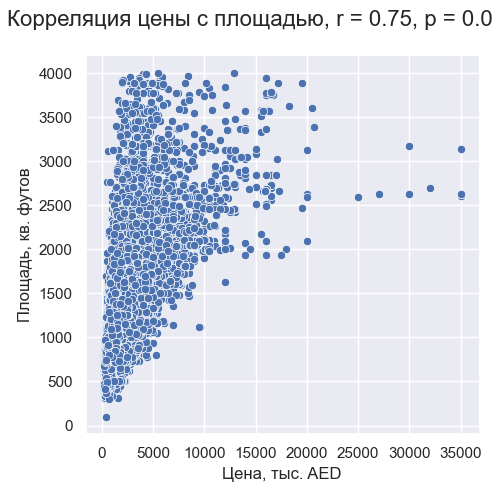

In [25]:
sns.relplot(x='price', y='surface', data=data)
plt.suptitle(f'Корреляция цены с площадью, r = {round(corr, 2)}, p = {pvalue}', size = 16)
plt.ylabel('Площадь, кв. футов')
plt.xlabel('Цена, тыс. AED')
plt.tight_layout()